# line search algorithm

- bracket minimum
- minimize(최적화 방법)

In [8]:
import numpy as np

In [9]:
from IPython.display import Image

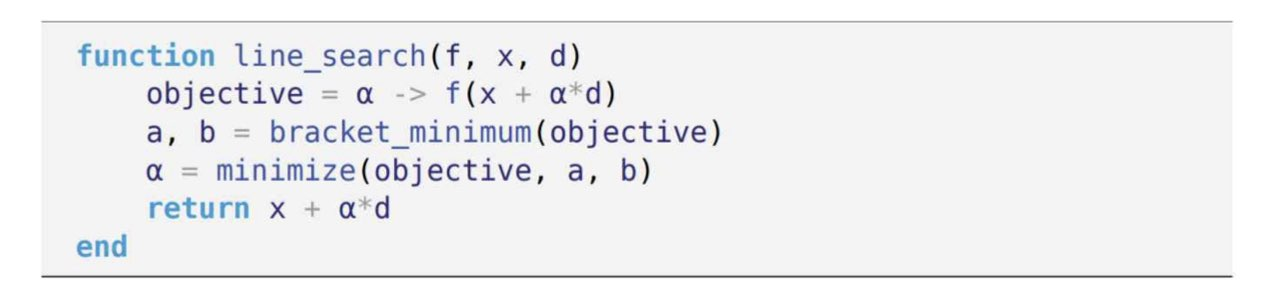

In [10]:
Image('fig1.jpg',width=640)

In [11]:
# Algorithm 3.1 : p.36

def bracket_minimum(f,x,s=1E-2,k=2.0):
    # 하이퍼 파라미터: x,s,k
    # x를 얼마로 주느냐에 따라 최소값이 존재한다고 생각되는 구간이 다 달라짐
    # 달라진 구간에서 goldenSection Search Method를 이용해서 적용한다고 생각하면
    # 중간 평가에서의 함수는 최소값 2개 존재. 둘 중 어느 하나 찾을 수 있음
    
    a,ya=x,f(x)
    b,yb=a+s, f(a+s)
    
    print('init: (a:%.4f, b:%.4f) (ya:%.4f, yb:%.4f)' %(a,b,ya,yb))
    
    if yb>ya:
        a,b=b,a
        ya,yb=yb,ya
        s=-s
    
    while True:
        c,yc=b+s,f(b+s)
        print('step: (a:%.4f, b:%.4f, c:%.4f) (ya:%.4f, yb:%.4f, yc:%.4f)'%(a,b,c,ya,yb,yc))
        
        if yc>yb:
            return (a,c) if a<c else (c,a)
        else:
            a,ya,b,yb=b,yb,c,yc
            s*=k

In [12]:
# Algorithm 3.3 : p.41

def golden_section_search(f,x,epsilon=1E-6):
    
    a,b=bracket_minimum(f,x)
    print('init: (a:%.4f, b:%.4f)' %(a,b))
    
    distance=abs(a-b)
    
    psi=0.5*(1.+np.sqrt(5))
    rho=psi**(-1)
    d=rho*b+(1.-rho)*a
    yd=f(d)
    
    i=1
    
    while distance>epsilon:    
        c=rho*a+(1.-rho)*b
        yc=f(c)
        
        if yc<yd:
            b,d,yd=d,c,yc
        else:
            a,b=b,c
        pa,pb=(a,b) if a<b else (b,a)
        print('%d:(a:%.4f, b:%.4f)' %(i,pa,pb))
        
        distance=abs(pa-pb)
        
        i+=1
        
    a,b=(a,b) if a<b else (b,a)
    x=0.5*(a+b)
    y=f(x)
    
    return x,y

# 초기값 x에 따라서 bracket_minimum 이 달라지니까 최소값이 달라지게 구해질 수 있음

In [13]:
# Algorithm 4.1 : p.54

def line_search(f,x,d):
    
    def obj(alpha):
        return f(x+alpha*d) #이 값이 작은 alpha를 찾아보자
    
    #a,b=bracket_minimum(obj,0.) --> 이건데 이미 golden section search 함수에 존재하는 코드임
    
    alpha,_=golden_section_search(obj,0.) #y는 사용 안할 꺼야! _로 지정
    
    return alpha,x+alpha*d


# 함수 내 함수: 내부 함수는 상위 함수 안에서만 사용됨.

In [14]:
# example 4.1 : p.55
def f(x):
    y=np.sin(x[0]*x[1])+np.exp(x[1]+x[2])-x[2]
    return y

x=np.asarray([1,2,3])
d=np.asarray([0,-1,-1])

line_search(f,x,d)
# 결과는 golden_section_search 에서 나온 값
# a,b가 굉장히 작아짐 그 중간값: 3.1270454770468
# 이 때 새로운 계획점은 1, -1.13, -0.13
# 책과 계산이 다름: 우리가 더 정확하게 계산함

init: (a:0.0000, b:0.0100) (ya:146.3225, yb:143.3978)
step: (a:0.0000, b:0.0100, c:0.0200) (ya:146.3225, yb:143.3978, yc:140.5312)
step: (a:0.0100, b:0.0200, c:0.0400) (ya:143.3978, yb:140.5312, yc:134.9678)
step: (a:0.0200, b:0.0400, c:0.0800) (ya:140.5312, yb:134.9678, yc:124.4890)
step: (a:0.0400, b:0.0800, c:0.1600) (ya:134.9678, yb:124.4890, yc:105.8941)
step: (a:0.0800, b:0.1600, c:0.3200) (ya:124.4890, yb:105.8941, yc:76.5712)
step: (a:0.1600, b:0.3200, c:0.6400) (ya:105.8941, yb:76.5712, yc:39.8823)
step: (a:0.3200, b:0.6400, c:1.2800) (ya:76.5712, yb:39.8823, yc:10.4124)
step: (a:0.6400, b:1.2800, c:2.5600) (ya:39.8823, yb:10.4124, yc:-0.0843)
step: (a:1.2800, b:2.5600, c:5.1200) (ya:10.4124, yb:-0.0843, yc:2.1037)
init: (a:1.2800, b:5.1200)
1:(a:1.2800, b:3.6533)
2:(a:2.1865, b:3.6533)
3:(a:2.7467, b:3.6533)
4:(a:2.7467, b:3.3070)
5:(a:2.9607, b:3.3070)
6:(a:2.9607, b:3.1747)
7:(a:3.0425, b:3.1747)
8:(a:3.0930, b:3.1747)
9:(a:3.0930, b:3.1435)
10:(a:3.1123, b:3.1435)
11:(a:3.

(3.1270454770468, array([ 1.        , -1.12704548, -0.12704548]))

- line search는 bracket_minimum 도 계산 여러번 하고
- golden_section_search 또 시행
- 매번 계획점 갱신할 때 마다 하는 것이 계산적으로 비효율적

-> alpha를 크게 해놓고 조건이 만족될 때 까지 적절히 줄여나가자  

-> backtracking line search algorithm

# backtracking line search

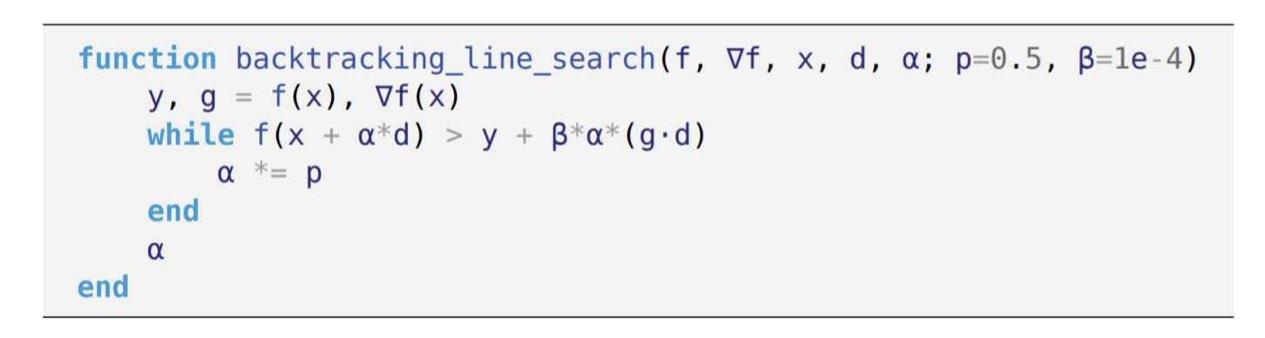

In [8]:
Image('fig3.jpg',width=640) #초모수: alph, p,beta(for 아르미오 조건)

In [9]:
# Algorithm 4.2 :p.56

def backtracking_line_search(f,gradient,x,d,alpha,p=0.5,beta=1E-4):
    
    y,g =f(x),gradient
    i=1
    
    while f(x+alpha*d) > y+beta*alpha*np.dot(g,d): 
        #np.dot(g,d) = d^t d -> 벡터 내적 ; g.T @ d로 계산 가능
        alpha*=p
        print('%d: alpha=%.4f'%(i,alpha))
        i+=1
        
    return alpha
    

In [10]:
# Example 4.2:p.58

def f(x):
    y=x[0]**2+x[0]*x[1]+x[1]**2
    return y


def pdf0(x):
    return 2*x[0]+x[1]

def pdf1(x):
    return 2*x[1]+x[0]

x=np.array([1,2])
d=np.array([-1,-1])
gradient=np.array([pdf0(x),pdf1(x)])

alpha=10

alpha=backtracking_line_search(f,gradient,x,d,alpha)
# alpha가 10이었던 것을 반으로 줄여
# 그래도 아르미오 컨디션 만족 안됨
# 더 줄여 -> 2.5
# 이 때의 목적함수 값이 아르미오 컨디션 만족하니까 단계값 alpha를 2.5라고 하자

x=x+alpha*d 
# 교재에서 step by step으로 풀어놓은 예제 존재 
# curvature information 헷세행렬 이용한 두번째 울프 컨디션도 같이 설명 -> 다음주~!

print(x) #계획점 [-1.5,-0.5]로 이동

# 이 계획점에서 다시 gradient 값 계산해서 backtracking으로 알파 결정, 계획점 갱신

## 하강 경사 반복법 이용해 최소값 찾을 수 있음

1: alpha=5.0000
2: alpha=2.5000
[-1.5 -0.5]


- backtracking line search 알고리즘은 아르미오 조건만 알면 굉장히 간단함!
- 단점은 gradient 알아야해